In [2]:
from bert_logistic import read_texts_from_dir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/thangquang09/CODE/CTAI_MachineLearning/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
train_path = "/home/thangquang09/CODE/CTAI_MachineLearning/data/fake-or-real-the-impostor-hunt/data/train"
test_path = "/home/thangquang09/CODE/CTAI_MachineLearning/data/fake-or-real-the-impostor-hunt/data/test"
gt_path = "/home/thangquang09/CODE/CTAI_MachineLearning/data/fake-or-real-the-impostor-hunt/data/train.csv"
print("Loading data...")
df_train = read_texts_from_dir(train_path)
df_test = read_texts_from_dir(test_path)
df_train_gt = pd.read_csv(gt_path)
y_train = df_train_gt["real_text_id"].values

Loading data...
Number of directories: 95
Number of directories: 1068


In [4]:
from nltk.tokenize import word_tokenize, sent_tokenize

# Tính số lượng từ và câu trong từng cột
df_train['num_words1'] = df_train['file_1'].apply(lambda x: len(word_tokenize(x)))
df_train['num_words2'] = df_train['file_2'].apply(lambda x: len(word_tokenize(x)))

df_train['num_sentences1'] = df_train['file_1'].apply(lambda x: len(sent_tokenize(x)))
df_train['num_sentences2'] = df_train['file_2'].apply(lambda x: len(sent_tokenize(x)))

## Phân phối chung của số lượng từ và số lượng câu

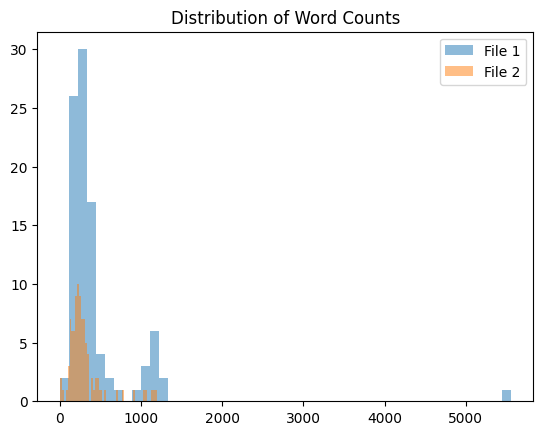

In [5]:
plt.hist(df_train['num_words1'], bins=50, alpha=0.5, label='File 1')
plt.hist(df_train['num_words2'], bins=50, alpha=0.5, label='File 2')
plt.legend()
plt.title('Distribution of Word Counts')
plt.show()

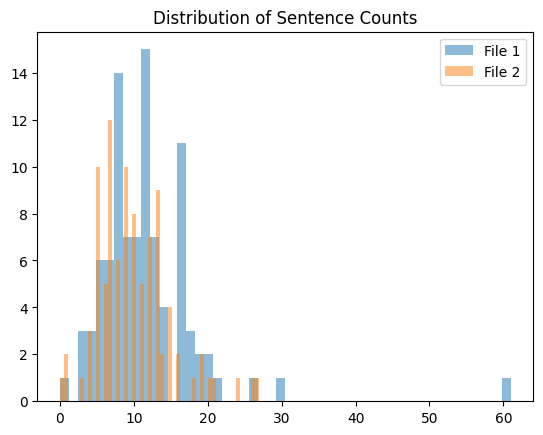

In [6]:
plt.hist(df_train['num_sentences1'], bins=50, alpha=0.5, label='File 1')
plt.hist(df_train['num_sentences2'], bins=50, alpha=0.5, label='File 2')
plt.title('Distribution of Sentence Counts')
plt.legend()
plt.show()

In [7]:
df_train['label'] = df_train_gt["real_text_id"]

In [8]:
real = []
fake = []

for row in df_train.itertuples():
    if row.label == 1:
        real.append(row.file_1)
    else:
        fake.append(row.file_1)
        
# words count for real and fake using nltk
words_count_real = [len(word_tokenize(text)) for text in real]
words_count_fake = [len(word_tokenize(text)) for text in fake]

# sentences count
sentences_count_real = [len(sent_tokenize(text)) for text in real]
sentences_count_fake = [len(sent_tokenize(text)) for text in fake]

### Phân phối của số lượng từ và số lượng câu theo label Real và Fake

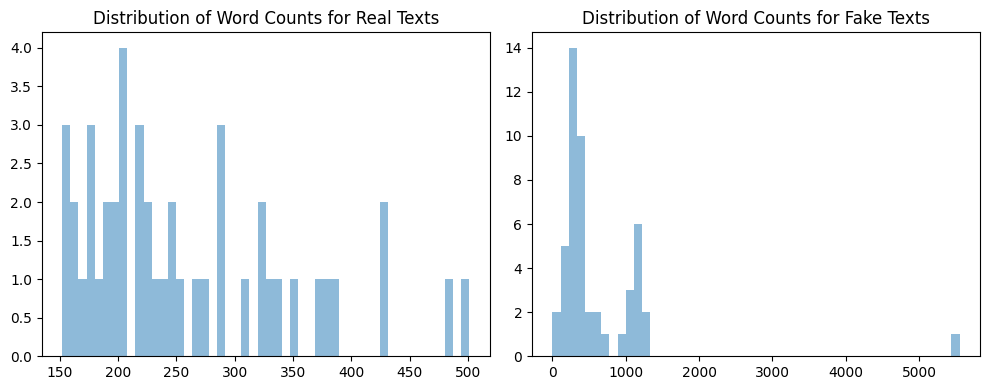

In [9]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(words_count_real, bins=50, alpha=0.5, label='Real')
plt.title('Distribution of Word Counts for Real Texts')

plt.subplot(1, 2, 2)
plt.hist(words_count_fake, bins=50, alpha=0.5, label='Fake')
plt.title('Distribution of Word Counts for Fake Texts')


plt.tight_layout()
plt.show()

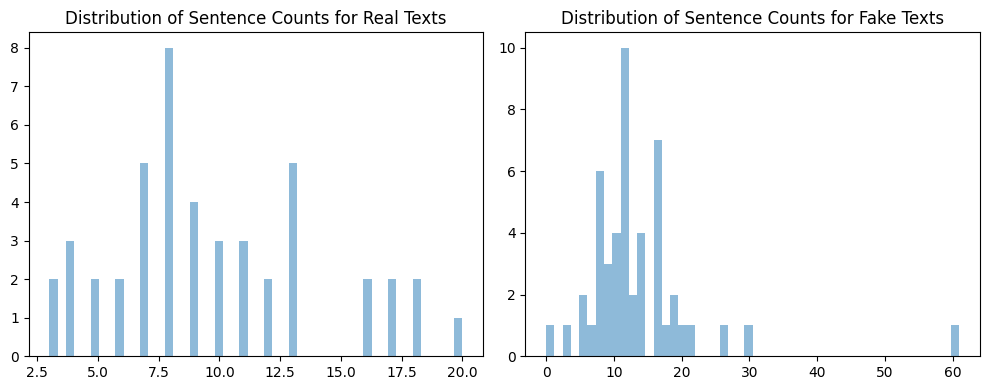

In [10]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(sentences_count_real, bins=50, alpha=0.5, label='Real')
plt.title('Distribution of Sentence Counts for Real Texts')

plt.subplot(1, 2, 2)
plt.hist(sentences_count_fake, bins=50, alpha=0.5, label='Fake')
plt.title('Distribution of Sentence Counts for Fake Texts')


plt.tight_layout()
plt.show()

In [11]:
import re

# Hàm lọc từ chỉ chứa chữ cái Latin
def count_latin_words(text):
    words = word_tokenize(text)
    latin_words = [word for word in words if re.match(r'^[a-zA-Z]+$', word)]
    return len(latin_words)

# Đếm số lượng từ Latin cho real và fake
latin_words_count_real = [count_latin_words(text) for text in real]
latin_words_count_fake = [count_latin_words(text) for text in fake]

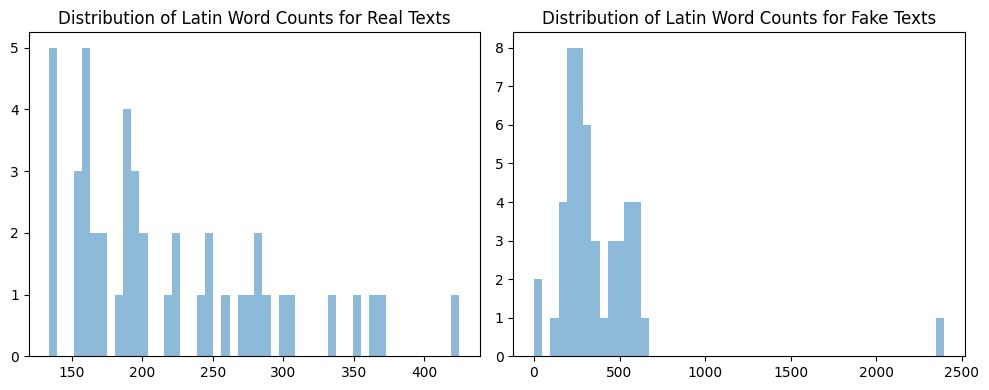

In [12]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(latin_words_count_real, bins=50, alpha=0.5, label='Real')
plt.title('Distribution of Latin Word Counts for Real Texts')

plt.subplot(1, 2, 2)
plt.hist(latin_words_count_fake, bins=50, alpha=0.5, label='Fake')
plt.title('Distribution of Latin Word Counts for Fake Texts')


plt.tight_layout()
plt.show()

In [29]:
def statistic_to_dataframe(array, label):
    return {
        "Statistic": label,
        "Mean": np.mean(array),
        "Median": np.median(array),
        "Standard Deviation": np.std(array),
        "Max": np.max(array),
        "Min": np.min(array)
    }

# Tạo danh sách các thống kê
statistics = [
    statistic_to_dataframe(words_count_real, "Words Count Real"),
    statistic_to_dataframe(words_count_fake, "Words Count Fake"),
    statistic_to_dataframe(sentences_count_real, "Sentences Count Real"),
    statistic_to_dataframe(sentences_count_fake, "Sentences Count Fake"),
    statistic_to_dataframe(latin_words_count_real, "Latin Words Count Real"),
    statistic_to_dataframe(latin_words_count_fake, "Latin Words Count Fake")
]

# Chuyển danh sách thành DataFrame
df_statistics = pd.DataFrame(statistics).set_index("Statistic")
df_statistics

,Mean,Median,Standard Deviation,Max,Min
Statistic,,,,,
Words Count Real,259.304348,228.5,89.222455,501,152
Words Count Fake,626.122449,362.0,802.234905,5553,0
Sentences Count Real,9.760870,9.0,4.223046,20,3
Sentences Count Fake,13.571429,12.0,8.715457,61,0
Latin Words Count Real,218.956522,196.0,71.277460,425,134
Latin Words Count Fake,377.204082,297.0,331.461142,2397,0


### EDA new

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
import re

In [30]:
df_train['real_text'] = np.where(df_train['label'] == 1, df_train['file_1'], df_train['file_2'])
df_train['fake_text'] = np.where(df_train['label'] == 1, df_train['file_2'], df_train['file_1'])

print("Dữ liệu sau khi tái cấu trúc:")
print(df_train[['real_text', 'fake_text']].head())

Dữ liệu sau khi tái cấu trúc:
                                            real_text  \
id                                                      
0   The VIRSA (Visible Infrared Survey Telescope A...   
1   The project aims to achieve an accuracy level ...   
2   Scientists can learn about how galaxies form a...   
3   The importance for understanding how stars evo...   
4   Analyzing how fast stars rotate within a galax...   

                                            fake_text  
id                                                     
0   The China relay network has released a signifi...  
1   China\nThe goal of this project involves achie...  
2   Dinosaur eggshells offer clues about what dino...  
3   China\nThe study suggests that multiple star s...  
4   Dinosaur Rex was excited about his new toy set...  


In [33]:
df = df_train.copy()

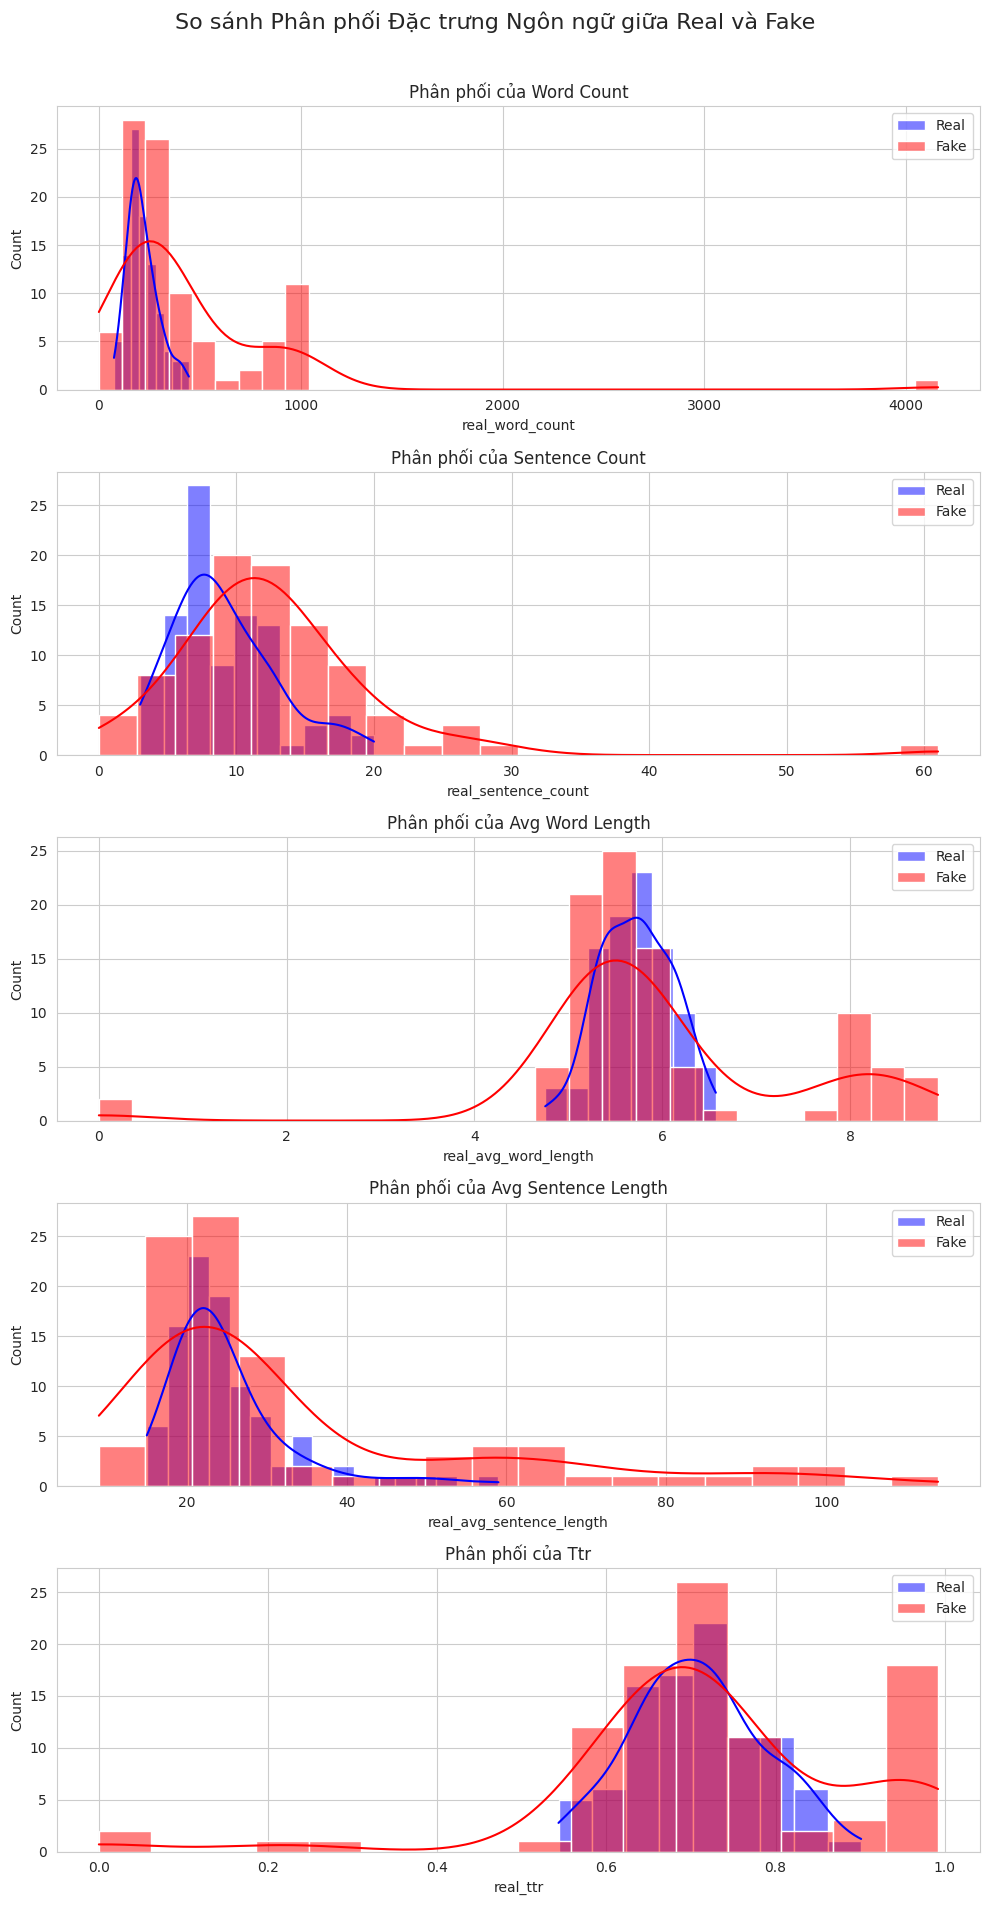

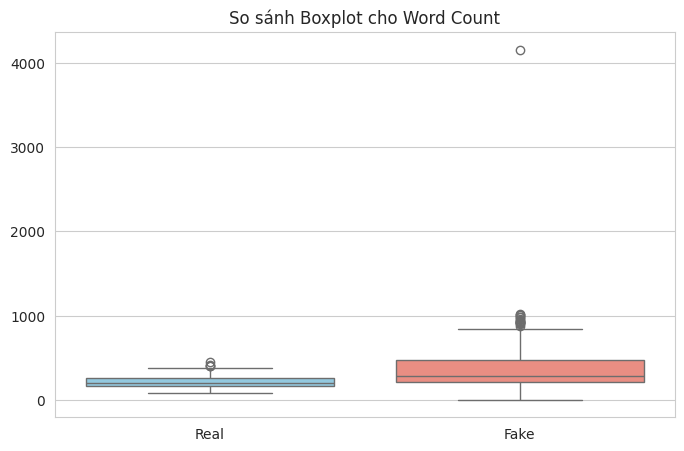

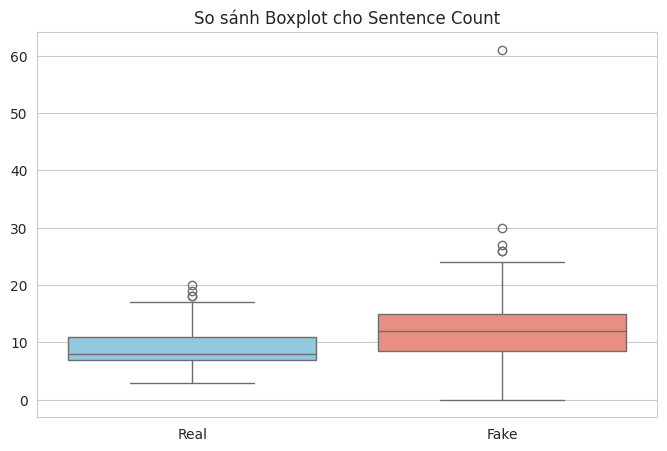

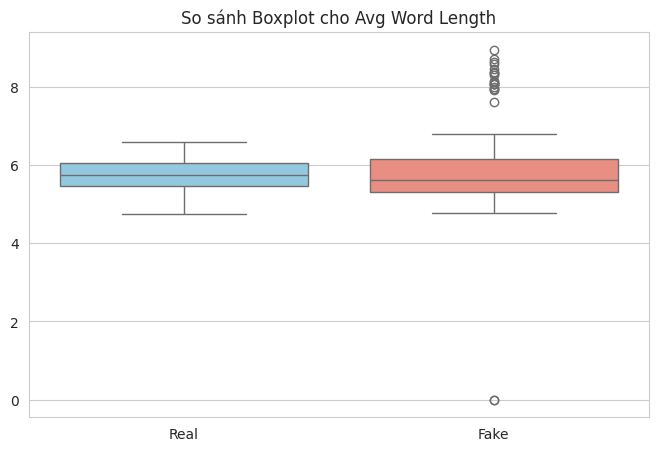

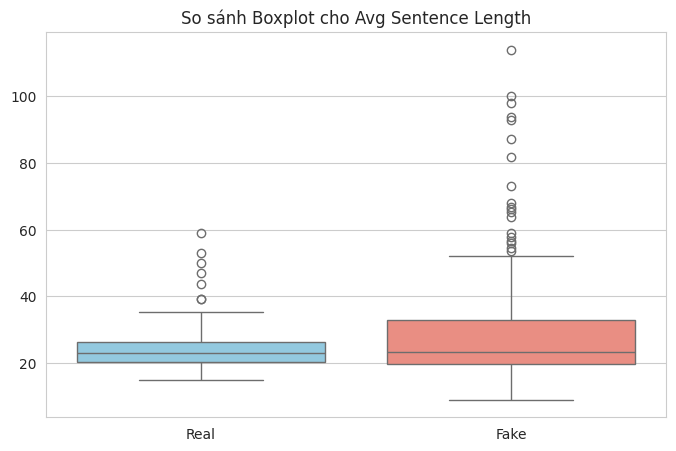

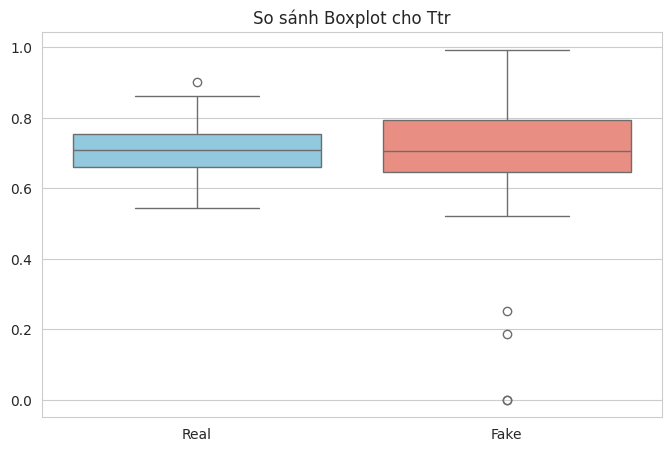

In [34]:
# --- Các hàm trợ giúp ---
def get_word_count(text):
    return len(str(text).split())

def get_sentence_count(text):
    return len(nltk.sent_tokenize(str(text)))

def get_avg_word_length(text):
    words = str(text).split()
    if not words:
        return 0
    return sum(len(word) for word in words) / len(words)

def get_ttr(text):
    tokens = [word.lower() for word in str(text).split()]
    if not tokens:
        return 0
    types = set(tokens)
    return len(types) / len(tokens)

# --- Tạo các feature mới ---
feature_funcs = {
    'word_count': get_word_count,
    'sentence_count': get_sentence_count,
    'avg_word_length': get_avg_word_length,
    'ttr': get_ttr
}

for name, func in feature_funcs.items():
    df[f'real_{name}'] = df['real_text'].apply(func)
    df[f'fake_{name}'] = df['fake_text'].apply(func)
    
# Thêm độ dài câu trung bình
df['real_avg_sentence_length'] = df['real_word_count'] / df['real_sentence_count']
df['fake_avg_sentence_length'] = df['fake_word_count'] / df['fake_sentence_count']

# --- Trực quan hóa ---
features_to_plot = ['word_count', 'sentence_count', 'avg_word_length', 'avg_sentence_length', 'ttr']

sns.set_style("whitegrid")
fig, axes = plt.subplots(len(features_to_plot), 1, figsize=(10, 20))
fig.suptitle('So sánh Phân phối Đặc trưng Ngôn ngữ giữa Real và Fake', fontsize=16)

for i, feature in enumerate(features_to_plot):
    sns.histplot(df[f'real_{feature}'], ax=axes[i], color='blue', label='Real', kde=True)
    sns.histplot(df[f'fake_{feature}'], ax=axes[i], color='red', label='Fake', kde=True)
    axes[i].set_title(f'Phân phối của {feature.replace("_", " ").title()}', fontsize=12)
    axes[i].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

# Boxplot để so sánh rõ hơn
for feature in features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=[df[f'real_{feature}'], df[f'fake_{feature}']], palette=['skyblue', 'salmon'])
    plt.xticks([0, 1], ['Real', 'Fake'])
    plt.title(f'So sánh Boxplot cho {feature.replace("_", " ").title()}')
    plt.show()

Top 15 Bigrams trong văn bản REAL:
[(('large', 'telescope'), 19), (('adaptive', 'optics'), 16), (('star', 'formation'), 15), (('angular', 'resolution'), 9), (('across', 'various'), 8), (('individual', 'stars'), 8), (('black', 'holes'), 8), (('lambda', 'r'), 8), (('distant', 'galaxies'), 7), (('across', 'different'), 7), (('extremely', 'large'), 7), (('et', 'al'), 7), (('light', 'curves'), 6), (('telescopes', 'like'), 6), (('european', 'extremely'), 6)]


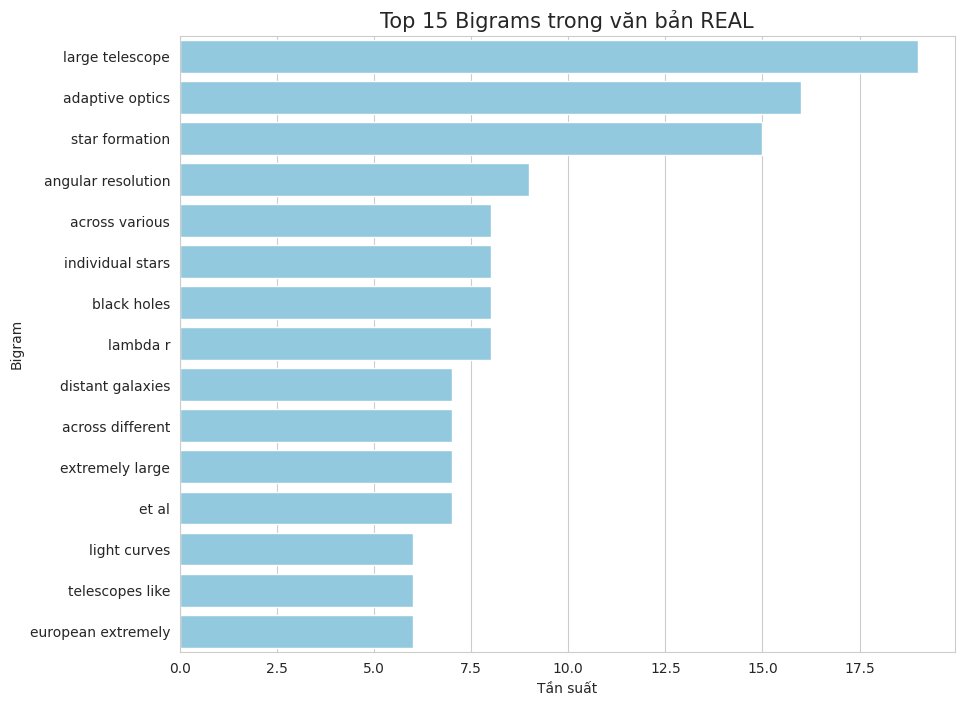


Top 15 Bigrams trong văn bản FAKE:
[(('resolvediaz', 'hen'), 19), (('inhibitory', 'penh'), 19), (('penh', 'eg'), 19), (('gar', 'violence'), 19), (('violence', 'relevcommunity'), 19), (('relevcommunity', 'sentiment'), 19), (('sentiment', 'arbitrowani'), 19), (('eks', 'empty'), 19), (('empty', 'zus'), 19), (('zus', 'republicanune'), 19), (('republicanune', 'togg'), 19), (('togg', 'legen'), 19), (('neugadastarting', 'src'), 19), (('template', 'upset'), 19), (('upset', 'casestl'), 19)]


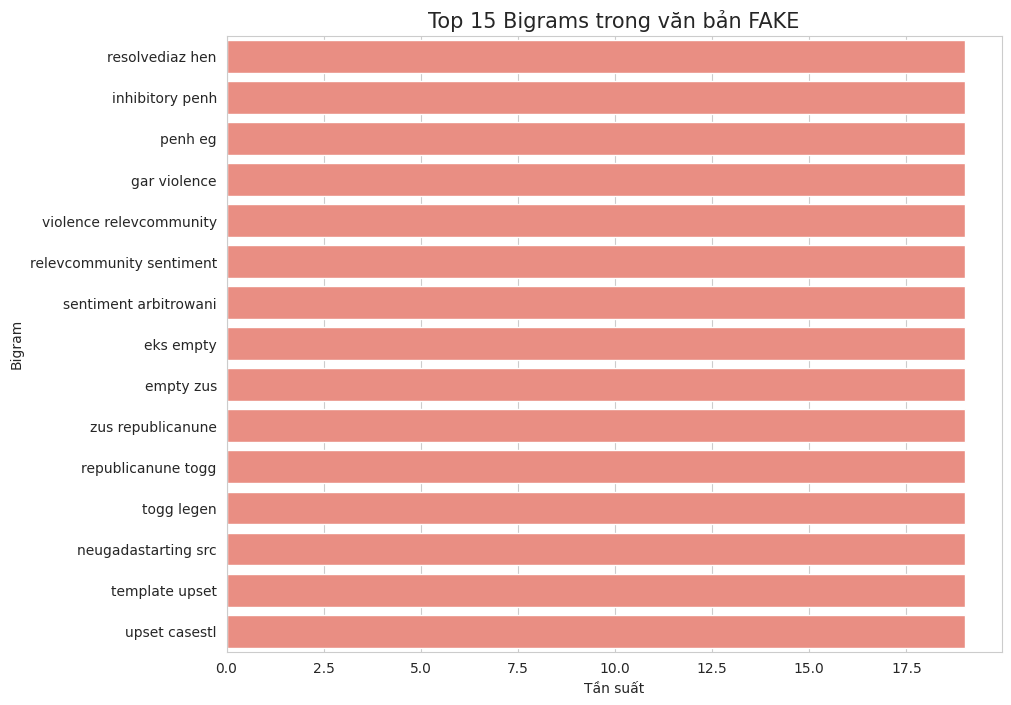

In [36]:
from nltk.corpus import stopwords
from nltk import bigrams

stop_words = set(stopwords.words('english'))

def get_top_ngrams(corpus, n=2, top_k=20):
    # Tiền xử lý: chuyển thành chữ thường, loại bỏ ký tự không phải chữ cái và stop words
    corpus = corpus.lower()
    corpus = re.sub(r'[^a-zA-Z\s]', '', corpus)
    tokens = [word for word in corpus.split() if word not in stop_words]
    
    # Tạo n-grams và đếm
    n_grams = bigrams(tokens)
    n_gram_counts = Counter(n_grams)
    
    return n_gram_counts.most_common(top_k)

# Gộp tất cả văn bản real và fake lại
real_corpus = ' '.join(df['real_text'].astype(str))
fake_corpus = ' '.join(df['fake_text'].astype(str))

# Lấy top bigrams
top_real_bigrams = get_top_ngrams(real_corpus, n=2, top_k=15)
top_fake_bigrams = get_top_ngrams(fake_corpus, n=2, top_k=15)

# --- Trực quan hóa top bigrams ---
def plot_top_ngrams(data, title, color):
    # Chuyển đổi dữ liệu để vẽ biểu đồ
    labels = [' '.join(gram) for gram, count in data]
    counts = [count for gram, count in data]
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x=counts, y=labels, color=color)
    plt.title(title, fontsize=15)
    plt.xlabel('Tần suất')
    plt.ylabel('Bigram')
    plt.show()

print("Top 15 Bigrams trong văn bản REAL:")
print(top_real_bigrams)
plot_top_ngrams(top_real_bigrams, 'Top 15 Bigrams trong văn bản REAL', 'skyblue')

print("\nTop 15 Bigrams trong văn bản FAKE:")
print(top_fake_bigrams)
plot_top_ngrams(top_fake_bigrams, 'Top 15 Bigrams trong văn bản FAKE', 'salmon')

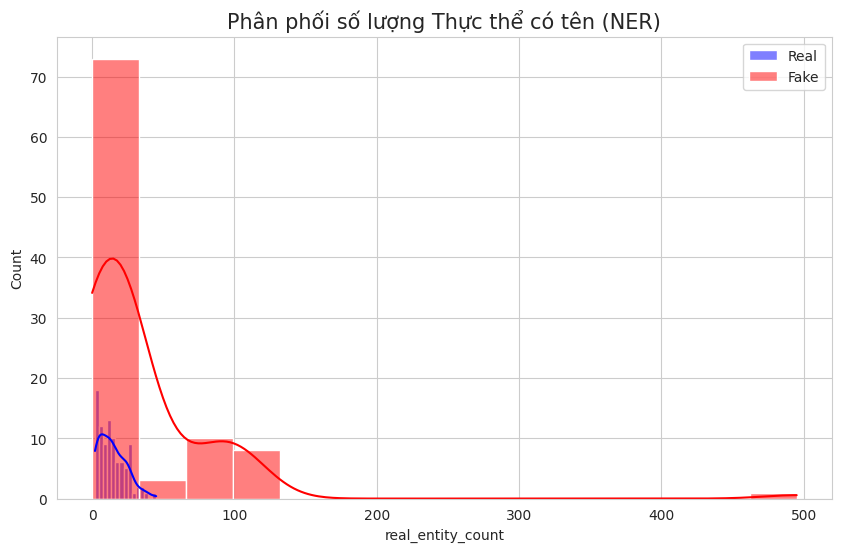

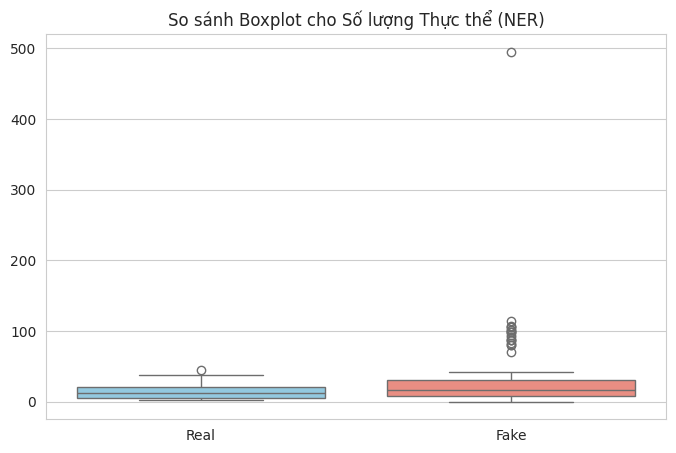

In [41]:
import spacy

# Tải mô hình spaCy (chỉ cần chạy một lần)
try:
    nlp = spacy.load('en_core_web_sm')
except OSError:
    print("Mô hình 'en_core_web_sm' chưa được tải. Vui lòng chạy:")
    print("python -m spacy download en_core_web_sm")
    nlp = None

if nlp:
    def count_entities(text):
        doc = nlp(str(text))
        return len(doc.ents)

    # Tạo feature số lượng thực thể
    df['real_entity_count'] = df['real_text'].apply(count_entities)
    df['fake_entity_count'] = df['fake_text'].apply(count_entities)

    # --- Trực quan hóa ---
    plt.figure(figsize=(10, 6))
    sns.histplot(df['real_entity_count'], color='blue', label='Real', kde=True, bins=15)
    sns.histplot(df['fake_entity_count'], color='red', label='Fake', kde=True, bins=15)
    plt.title('Phân phối số lượng Thực thể có tên (NER)', fontsize=15)
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=[df['real_entity_count'], df['fake_entity_count']], palette=['skyblue', 'salmon'])
    plt.xticks([0, 1], ['Real', 'Fake'])
    plt.title('So sánh Boxplot cho Số lượng Thực thể (NER)')
    plt.show()

## Insight


1. Đặc trưng về độ dài (Word, Sentences Count)
   - Văn bản REAL có độ dài rất ổn định và tập trung vào một khoảng hẹp (từ 150 tới 400 từ, và 5 tới 15 câu). Phân phối gần như đối xứng.
   - Văn bản FAKE có phân phối cực kỳ lệch. Một nhóm rất lớn văn bản siêu ngắn và một nhóm nhỏ các văn bản siêu dài $\implies$ sự biến thiên rất lớn

2. Đặc trưng về Văn phong và nội dung (TTR và N-Grams)
   - TTR (độ đa dạng từ vựng): phân phối khá là tương đồng, nhưng văn bản FAKE có một số outliers với TTR rất thấp, cho thấy nó rất lặp lại từ ngữ.
   - N-Grams (Bigrams): 
     - REAL: Rất hợp lý và mang tính học thuật, có chủ đề `thiên văn học` ("large telescope", "star formation", "adaptive optics")
     - FAKE: Hoàn toàn vô nghĩa và kỳ lạ: "resolvediaz hen", "inhibitory penh", "empty zus"

3. Đặc trưng về thực thể NER
   - Văn bản REAL có số lượng thực thể ổn định hơn và trong khoảng hẹp
   - Văn bản FAKE có một số lượng lớn các bài **không có hoặc có rất ít thực thể**, nhưng đồng thời có những bài ảo giác ra **số lượng thực thể khổng lồ**

### Tìm ra Rule-Based

In [44]:
train_path = "/home/thangquang09/CODE/CTAI_MachineLearning/data/fake-or-real-the-impostor-hunt/data/train"
test_path = "/home/thangquang09/CODE/CTAI_MachineLearning/data/fake-or-real-the-impostor-hunt/data/test"
gt_path = "/home/thangquang09/CODE/CTAI_MachineLearning/data/fake-or-real-the-impostor-hunt/data/train.csv"
print("Loading data...")
df_train = read_texts_from_dir(train_path)
df_test = read_texts_from_dir(test_path)
df_train_gt = pd.read_csv(gt_path)
y_train = df_train_gt["real_text_id"].values

df_train['label'] = df_train_gt["real_text_id"]

df = df_train.copy()

Loading data...
Number of directories: 95
Number of directories: 1068


In [45]:
df['real_text'] = np.where(df['label'] == 1, df['file_1'], df['file_2'])
df['fake_text'] = np.where(df['label'] == 1, df['file_2'], df['file_1'])


def get_word_count(text): return len(str(text).split())
def get_sentence_count(text): return len(nltk.sent_tokenize(str(text)))
def count_entities(text):
    if not nlp: return 0
    doc = nlp(str(text))
    return len(doc.ents)

# Tạo DataFrame chứa các feature của văn bản REAL
df_real_features = pd.DataFrame({
    'word_count': df['real_text'].apply(get_word_count),
    'sentence_count': df['real_text'].apply(get_sentence_count),
    'ner_count': df['real_text'].apply(count_entities),
    'label': 'Real'
})

# Tạo DataFrame chứa các feature của văn bản FAKE
df_fake_features = pd.DataFrame({
    'word_count': df['fake_text'].apply(get_word_count),
    'sentence_count': df['fake_text'].apply(get_sentence_count),
    'ner_count': df['fake_text'].apply(count_entities),
    'label': 'Fake'
})

# Gộp lại thành một DataFrame duy nhất để huấn luyện các Decision Stump
df_for_stumps = pd.concat([df_real_features, df_fake_features], ignore_index=True)
y_stump = df_for_stumps['label']
print("--- Dữ liệu đã được chuẩn bị để tìm ngưỡng ---")
print(df_for_stumps.head())
print("...")

--- Dữ liệu đã được chuẩn bị để tìm ngưỡng ---
   word_count  sentence_count  ner_count label
0         304               9         19  Real
1         137               4          5  Real
2         159               3          3  Real
3         262               6          4  Real
4         123               4          2  Real
...


In [47]:
from sklearn.tree import DecisionTreeClassifier, export_text


features_to_find_rules = ['word_count', 'sentence_count', 'ner_count']
optimal_thresholds = {}

print("\nBắt đầu tìm ngưỡng tối ưu cho từng feature...\n")

for feature in features_to_find_rules:
    X_feature = df_for_stumps[[feature]]
    
    stump_model = DecisionTreeClassifier(max_depth=1, random_state=42)
    stump_model.fit(X_feature, y_stump)
    
    # Trích xuất ngưỡng và quy tắc
    threshold = stump_model.tree_.threshold[0]
    optimal_thresholds[feature] = round(threshold, 2)
    rule_text = export_text(stump_model, feature_names=[feature])
    
    print(f"--- Quy tắc cho '{feature}' ---")
    print(rule_text)
    print(f"===> Ngưỡng tối ưu tìm được: {optimal_thresholds[feature]}\n")




Bắt đầu tìm ngưỡng tối ưu cho từng feature...

--- Quy tắc cho 'word_count' ---
|--- word_count <= 412.00
|   |--- class: Real
|--- word_count >  412.00
|   |--- class: Fake

===> Ngưỡng tối ưu tìm được: 412.0

--- Quy tắc cho 'sentence_count' ---
|--- sentence_count <= 10.50
|   |--- class: Real
|--- sentence_count >  10.50
|   |--- class: Fake

===> Ngưỡng tối ưu tìm được: 10.5

--- Quy tắc cho 'ner_count' ---
|--- ner_count <= 58.00
|   |--- class: Real
|--- ner_count >  58.00
|   |--- class: Fake

===> Ngưỡng tối ưu tìm được: 58.0

